### PREPERATION FOR DATASETS

In [ ]:
# Import libraries needed -- the cleaned up version
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.cluster.hierarchy as shc

from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

In [ ]:
# Download validclust for later
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import all datasets from hard drive
  # We imported all 9 files (8 datasets and the world indicator data) here before we began the project
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv
Saving World Indicators.csv to World Indicators.csv


In [ ]:
# Reading all the files
df_D1 = pd.read_csv('Data1.csv')
df_D2 = pd.read_csv('Data2.csv')
df_D3 = pd.read_csv('Data3.csv')
df_D4 = pd.read_csv('Data4.csv')
df_D5 = pd.read_csv('Data5.csv')
df_D6 = pd.read_csv('Data6.csv')
df_D7 = pd.read_csv('Data7.csv')
df_D8 = pd.read_csv('Data8.csv')

In [ ]:
# Code for accuracy and F-1 score
def cluster_evaluation(true_data, kmeans_data, hierarchical_data):
    print("Original Class" + str(np.array(true_data))+"\n")
    print("KMeans Class" + str(np.array(kmeans_data))+"\n")
    print("Hierarchical Class" + str(np.array(hierarchical_data))+"\n")

    print("Note on the following accuracy and F-1 scores ----------------")
    print("Due to the constantly changing clusters and no way to predict " +
            "the next available cluster, so these accuracy scores are incorrect.")
    print("These scores are closer to probability of likelihood stores than the accuracy, but they still map out how many values match.")
    print("Because of the changing clusters, we were also unable to successfully map the clusters out exactly the same each time.")
    print("Additionally, in the real world, we would not be given the true clusters. So to simulate a more accurate portrayal, we did not map any values.")
    print("Therefore the following results are inaccurte accuracy findings, but the correct steps to solve for accuracy.")
    print("End Note ------------------------------------------------------ \n")

    print("Accuracy_score of KMeans: " + str(accuracy_score(true_data, kmeans_data))+"\n")
    print("F1_score of KMeans: " + str(f1_score(true_data, kmeans_data,average='micro'))+"\n")
    print("Accuracy_score of Hierarchical Data: " + str(accuracy_score(true_data, hierarchical_data))+"\n")
    print("F1_score of Hierarchical Data: " + str(f1_score(true_data, hierarchical_data,average='micro'))+"\n")

    

# DATA 1

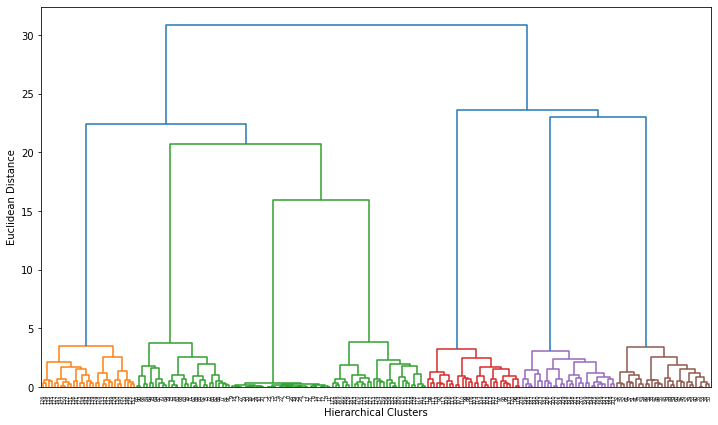

Unnamed: 0        X1        X2        X3  Class  New Class  Cluster  \
0             1 -0.063274  0.027734  0.022683      1          0        1   
1             2 -0.000731  0.048211  0.069198      1          0        1   
2             3 -0.060767 -0.009080  0.053085      1          0        1   
3             4  0.013252 -0.011876  0.055324      1          0        1   
4             5 -0.054508 -0.003813  0.001738      1          0        1   
..          ...       ...       ...       ...    ...        ...      ...   
207         208  0.175738 -0.053478 -2.733752      7          6        3   
208         209  0.396046 -0.858377 -3.126866      7          6        3   
209         210 -0.406362 -0.334541 -2.885598      7          6        3   
210         211 -0.299275  0.071281 -3.642585      7          6        3   
211         212 -0.506192  0.433538 -2.608597      7          6        3   

     Heirarchial_PC  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
207               3  
208               3  
209               3  
210               3  
211               3  

[212 rows x 8 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D1
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
kmeans.fit(data.iloc[:,1:4])
data['Cluster'] = kmeans.predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creating the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data


In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 7
The number of clusters calculated for Hierarchical is: 5

Original Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]

KMeans Class[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]



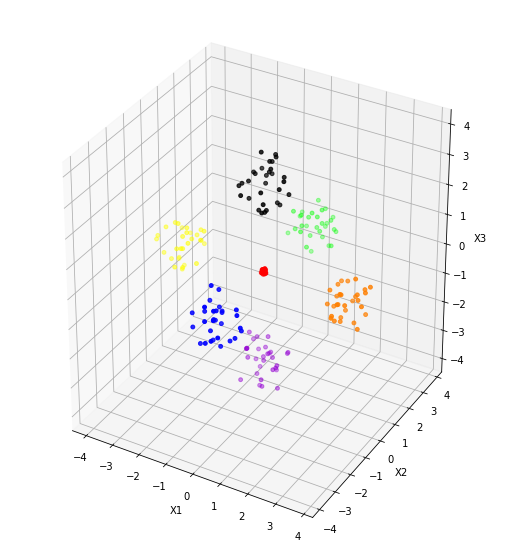

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

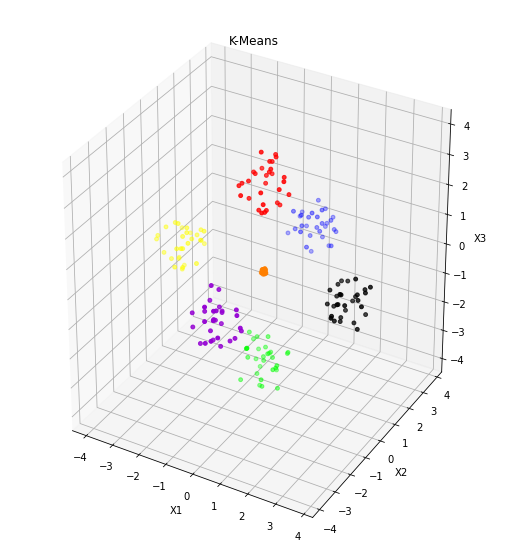

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

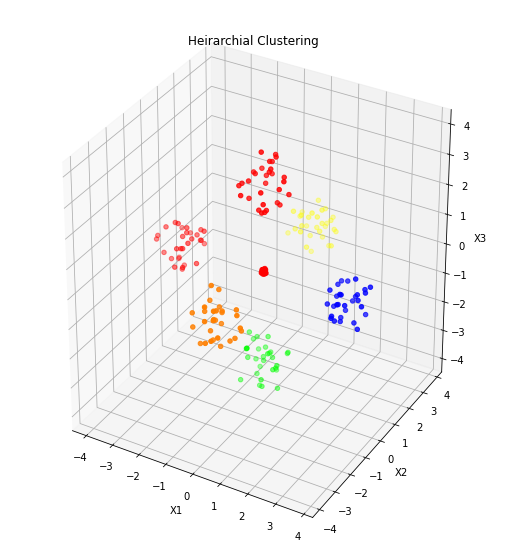

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# DATA 2

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D2
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data


Unnamed: 0         X         Y         C  Class  New Class  Cluster  \
0           X1  3.277701  0.814082  0.326574      1          0        0   
1           X2  0.387577  0.176780  0.888046      1          0        2   
2           X3  0.268546  0.582963  0.080981      1          0        2   
3           X4  2.031145  0.244597  0.643921      1          0        0   
4           X5  0.188677  0.461280  0.496633      1          0        2   
..         ...       ...       ...       ...    ...        ...      ...   
399       X400  3.248655  2.297291  3.388138      3          2        1   
400          X  4.100000  5.100000  0.504558      4          3        3   
401        X.1  3.900000  4.900000  0.941634      4          3        3   
402        X.2  4.000000  5.000000  0.702123      4          3        3   
403        X.3  4.100000  5.100000  0.887645      4          3        3   

     Heirarchial_PC  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
399               0  
400               0  
401               0  
402               0  
403               0  

[404 rows x 8 columns]

In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 4
The number of clusters calculated for Hierarchical is: 2

Original Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3]

KMeans Class[0 2 2 0 2 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

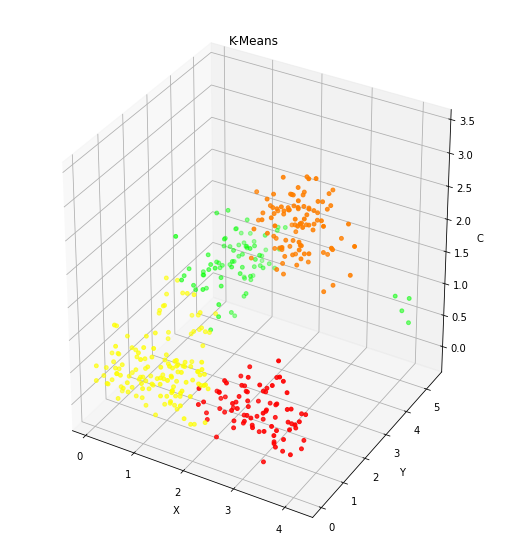

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

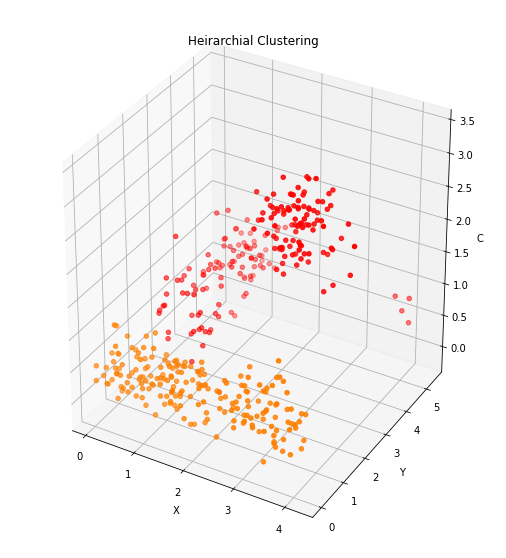

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# DATA 3

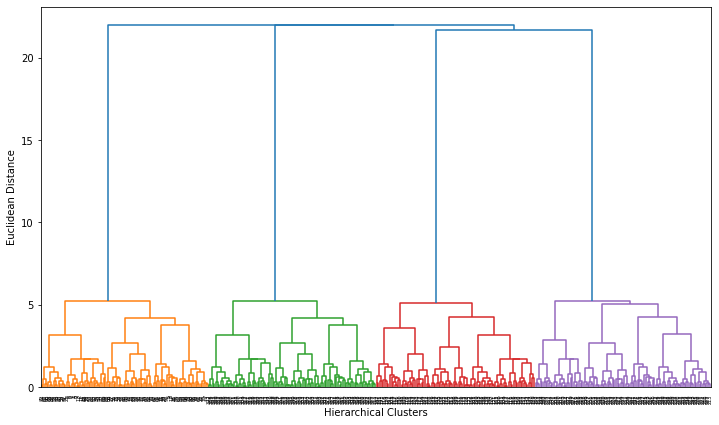

Unnamed: 0        X1        X2        X3  Class  New Class  Cluster  \
0             1  1.295428  0.050829 -0.385217      1          0        0   
1             2  1.409178 -0.035191 -0.251980      1          0        0   
2             3  1.096803  0.246365 -0.415011      1          0        0   
3             4  1.463328  0.265354 -0.513488      1          0        0   
4             5  1.603284  0.080577 -0.470257      1          0        0   
..          ...       ...       ...       ...    ...        ...      ...   
395         396  0.795695  0.209456  1.880609      4          3        3   
396         397  0.653127 -0.703156  1.549448      4          3        3   
397         398 -0.726249 -0.103244  0.694300      4          3        3   
398         399  0.808596 -0.492640  1.649370      4          3        3   
399         400  0.749291 -0.447840  0.863555      4          3        3   

     Heirarchial_PC  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
395               2  
396               2  
397               2  
398               2  
399               2  

[400 rows x 8 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D3
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data


In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 4
The number of clusters calculated for Hierarchical is: 4

Original Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

KMeans Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

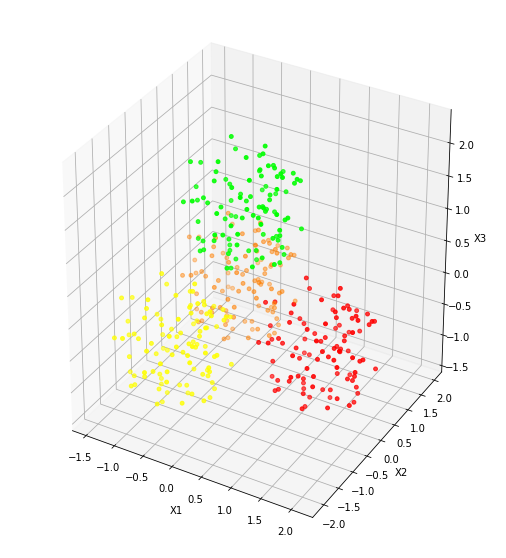

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

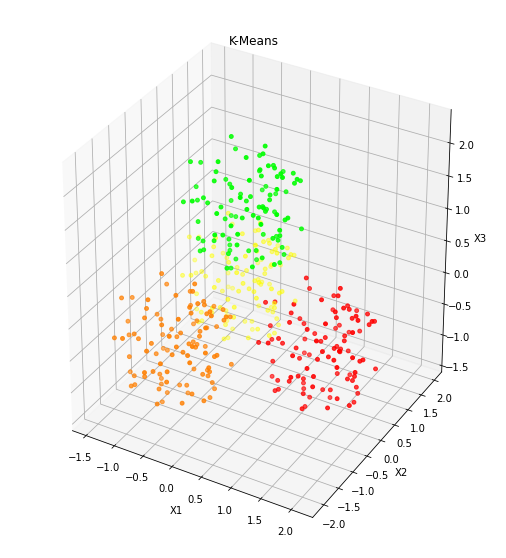

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# DATA 4

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D4
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data


Unnamed: 0       X1      X2       X3  Class  New Class  Cluster  \
0             1 -0.45300 -0.8910  0.02300      1          0        0   
1             2  0.65300 -0.8460  0.02110      1          0        0   
2             3  0.39800  0.9130 -0.00139      1          0        1   
3             4  0.09520  1.0500  0.00628      1          0        1   
4             5  0.52400 -0.9410  0.03780      1          0        0   
..          ...      ...     ...      ...    ...        ...      ...   
995         996  0.01520  0.0531 -0.36100      2          1        0   
996         997  0.05160  0.6910  0.87500      2          1        1   
997         998 -0.00511  1.3900 -0.94700      2          1        1   
998         999 -0.06710  0.7140  0.88100      2          1        1   
999        1000 -0.05770  0.4280 -0.73000      2          1        1   

     Heirarchial_PC  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1  
..              ...  
995               0  
996               0  
997               0  
998               0  
999               0  

[1000 rows x 8 columns]

In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 2
The number of clusters calculated for Hierarchical is: 2

Original Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

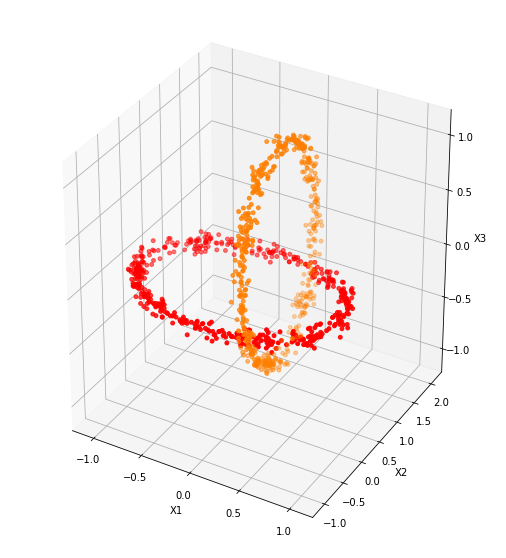

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

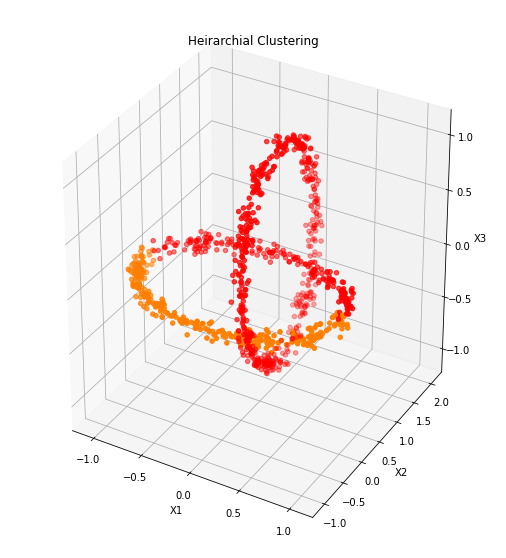

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# DATA 5

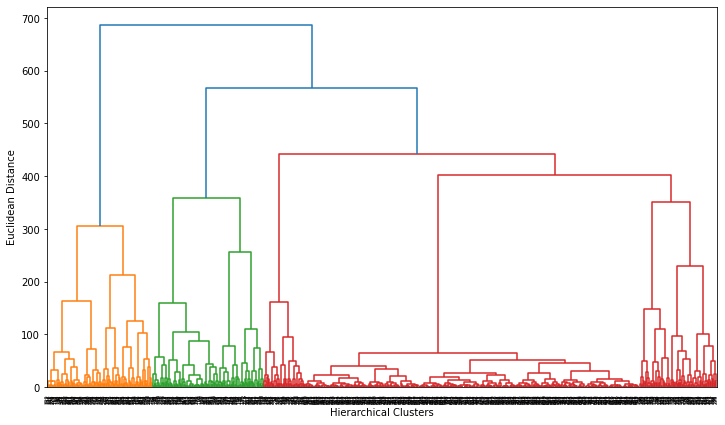

Unnamed: 0         X1         X2         X3  Class  New Class  Cluster  \
0             1  -4.822490 -50.402170   4.020861      1          0        0   
1             2 -44.460120  20.964670 -11.492060      1          0        0   
2             3  50.001020   0.780748   9.134460      1          0        0   
3             4 -41.699080 -22.310060  16.314120      1          0        1   
4             5   4.425242  -4.666664  50.223740      1          0        1   
..          ...        ...        ...        ...    ...        ...      ...   
795         796  -1.531027   0.681636   0.543271      2          1        0   
796         797   0.500754  -1.848209   0.605654      2          1        0   
797         798   1.089574  -0.246493  -3.355758      2          1        0   
798         799  -1.907717   4.964502   2.098423      2          1        0   
799         800   3.415463   4.529521  -1.617736      2          1        0   

     Heirarchial_PC  
0                 1  
1                 0  
2                 2  
3                 0  
4                 2  
..              ...  
795               0  
796               0  
797               0  
798               0  
799               0  

[800 rows x 8 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D5
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data

In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 2
The number of clusters calculated for Hierarchical is: 3

Original Class[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

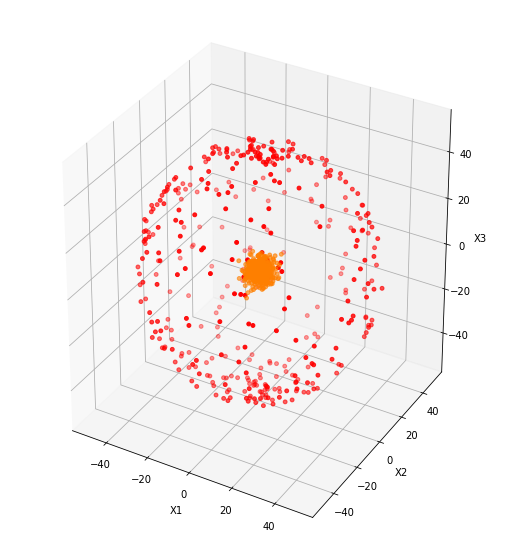

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

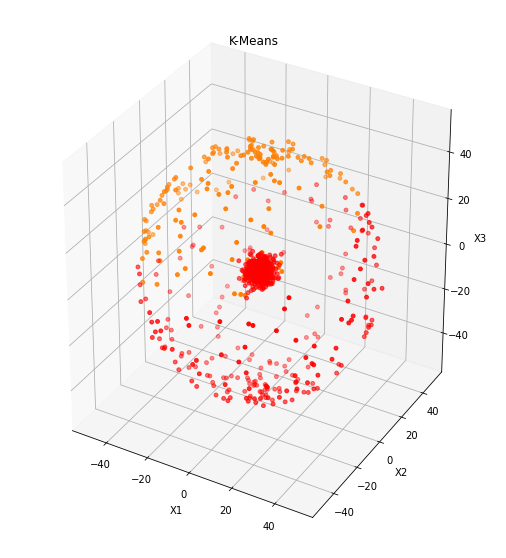

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

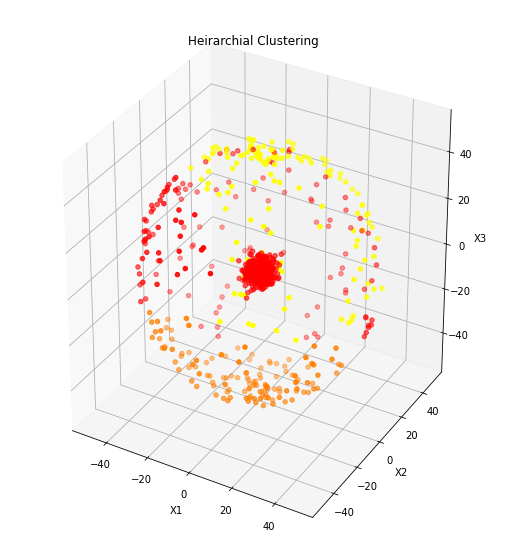

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# DATA 6

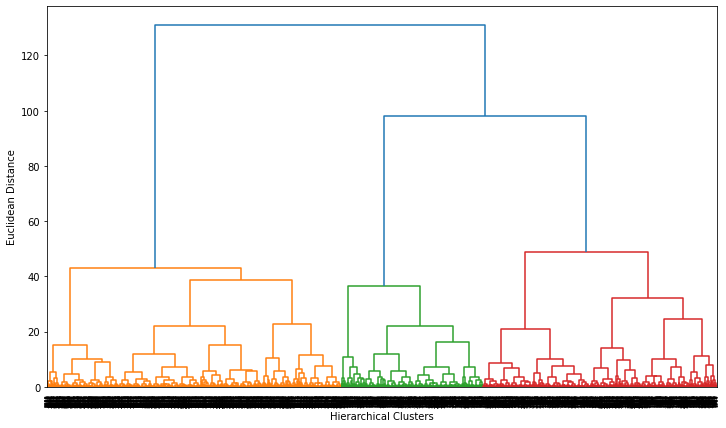

Unnamed: 0        X1        X2  Class  New Class  Cluster  \
0              1  1.388261  2.076096      1          0        0   
1              2  2.177247  3.102304      1          0        0   
2              3  0.378645  5.307610      1          0        0   
3              4  3.681732  1.622681      1          0        0   
4              5  2.462861  2.777897      1          0        0   
...          ...       ...       ...    ...        ...      ...   
4091        4092  0.909687  0.375763      2          1        1   
4092        4093  2.698381  0.511262      2          1        1   
4093        4094  1.078797  1.526153      2          1        1   
4094        4095  1.974889 -0.649343      2          1        1   
4095        4096 -0.127192 -0.763974      2          1        1   

      Heirarchial_PC  
0                  0  
1                  2  
2                  2  
3                  0  
4                  0  
...              ...  
4091               1  
4092               0  
4093               1  
4094               1  
4095               1  

[4096 rows x 7 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D6
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:3])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:3], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:3])
data['Heirarchial_PC'] = heirarchial_predict

data


In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 2
The number of clusters calculated for Hierarchical is: 3

Original Class[0 0 0 ... 1 1 1]

KMeans Class[0 0 0 ... 1 1 1]

Hierarchical Class[0 2 2 ... 1 1 1]

Note on the following accuracy and F-1 scores ----------------
Due to the constantly changing clusters and no way to predict the next available cluster, so these accuracy scores are incorrect.
These scores are closer to probability of likelihood stores than the accuracy, but they still map out how many values match.
Because of the changing clusters, we were also unable to successfully map the clusters out exactly the same each time.
Additionally, in the real world, we would not be given the true clusters. So to simulate a more accurate portrayal, we did not map any values.
Therefore the following results are inaccurte accuracy findings, but the correct steps to solve for accuracy.
End Note ------------------------------------------------------ 

Accuracy_score of KMeans: 0.95141

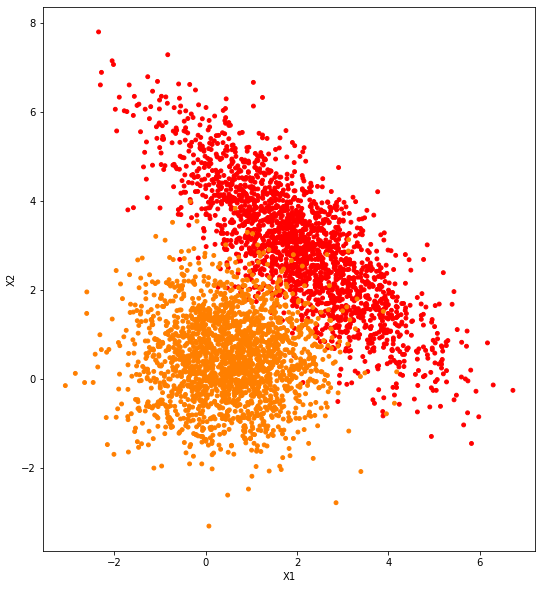

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.show()


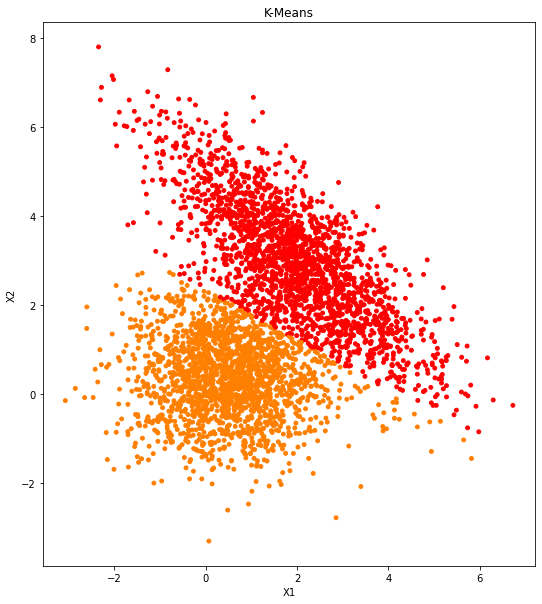

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
# Map the colors based on the column titled cluster
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
# Plot the graph
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.title("K-Means")
plt.show()

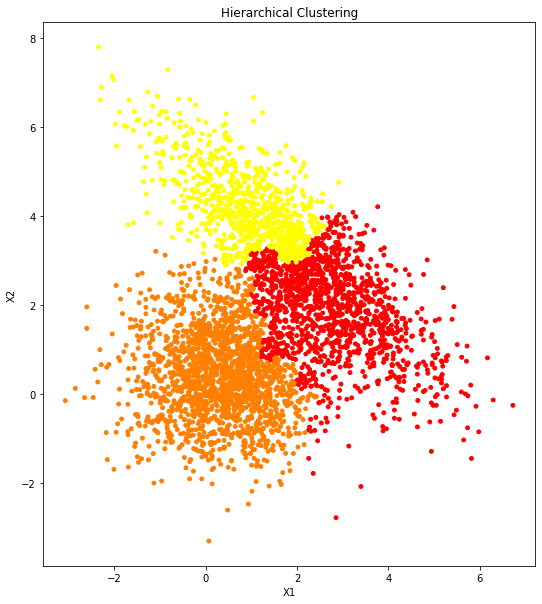

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
# Map the colors to the hierarcical data
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
# Plot the graph
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.title("Hierarchical Clustering")
plt.show()

# DATA 7

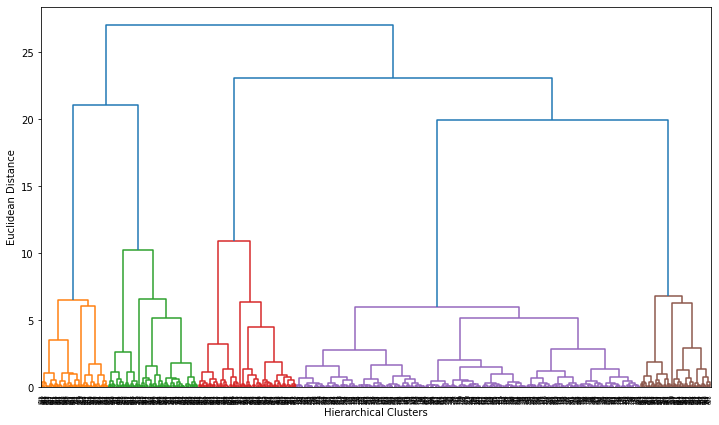

Unnamed: 0        X1        X2  Class  New Class  Cluster  Heirarchial_PC
0             1 -3.000000 -3.000000      5          4        0               2
1             2 -3.000000  3.000000      4          3        3               0
2             3  3.000000 -3.000000      6          5        4               1
3             4  3.000000  3.000000      3          2        5               3
4             5 -0.417091  0.114782      1          0        2               4
..          ...       ...       ...    ...        ...      ...             ...
765         766 -1.604434 -1.118861      2          1        0               2
766         767 -3.050000 -3.050000      5          4        0               2
767         768 -3.050000  2.950000      4          3        3               0
768         769  2.950000 -3.050000      6          5        4               1
769         770  2.950000  2.950000      3          2        5               3

[770 rows x 7 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D7
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:3])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:3], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:3])
data['Heirarchial_PC'] = heirarchial_predict

data


In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 6
The number of clusters calculated for Hierarchical is: 5

Original Class[4 3 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3 5 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

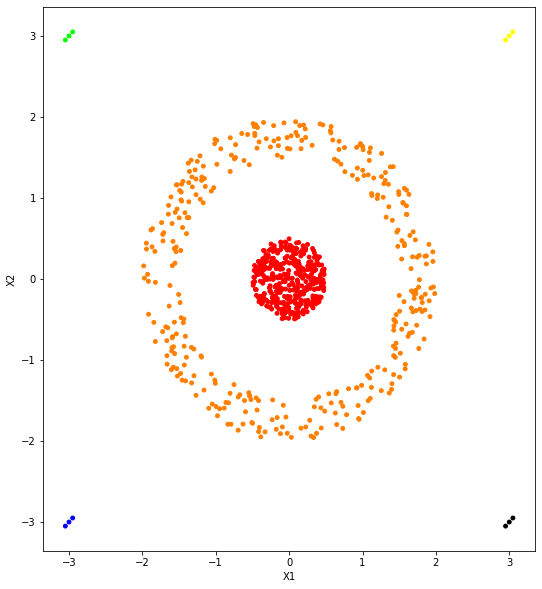

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.show()


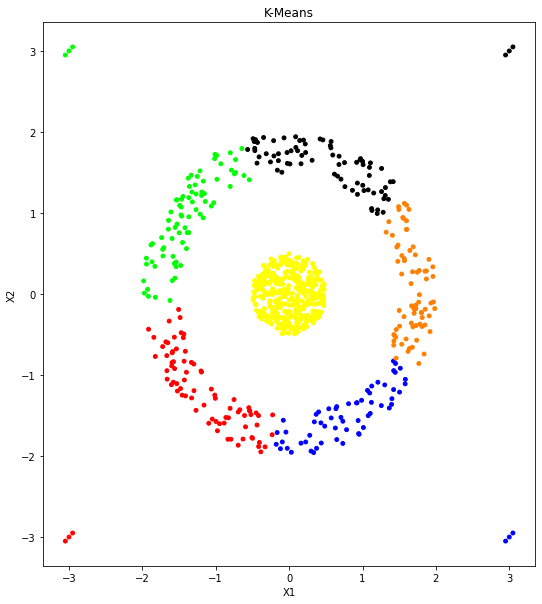

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
# Map the colors based on the column titled cluster
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
# Plot the graph
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.title("K-Means")
plt.show()

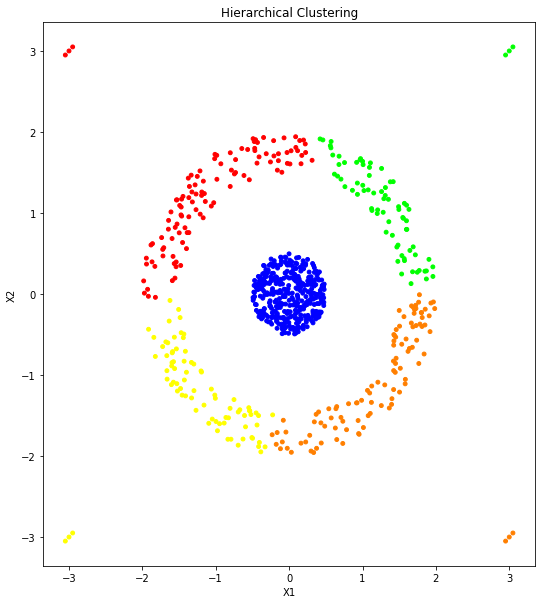

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
# Map the colors to the hierarcical data
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
# Plot the graph
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131)
ax.scatter(data.iloc[:,1], data.iloc[:,2], c = data['c'], s = 15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
plt.title("Hierarchical Clustering")
plt.show()

# DATA 8

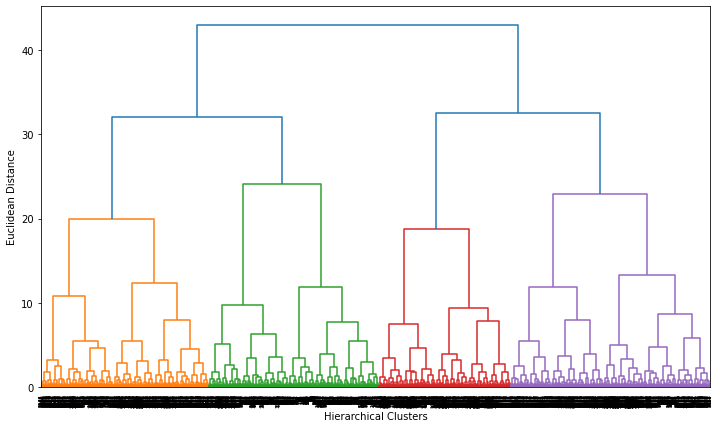

Unnamed: 0        X1        X2       X3  Class  New Class  Cluster  \
0              1  0.000000  0.000000  1.00000      1          0        0   
1              2  0.000000  0.052336  0.99863      1          0        0   
2              3  0.049774  0.016173  0.99863      1          0        0   
3              4  0.030762 -0.042341  0.99863      1          0        0   
4              5 -0.030762 -0.042341  0.99863      1          0        0   
...          ...       ...       ...      ...    ...        ...      ...   
3997        3998  0.049774 -0.016173 -0.99863      1          0        0   
3998        3999  0.000000 -0.052336 -0.99863      1          0        0   
3999        4000 -0.049774 -0.016173 -0.99863      1          0        0   
4000        4001 -0.030762  0.042341 -0.99863      1          0        0   
4001        4002  0.000000  0.000000 -1.00000      1          0        0   

      Heirarchial_PC  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3997               2  
3998               2  
3999               2  
4000               1  
4001               2  

[4002 rows x 8 columns]

In [ ]:
####### 1. Use K-means and hierarchical clustering methods to generate clusters #######

### K-means ###

# Import the dataset as a function titled data
data = df_D8
# Get the number of classes there are
cluster_number = len(data.Class.unique())
# Change the dataset so that the values for class will match the values we use to determine the clustering via K-means and hierarchical data clustering
data['New Class'] = data['Class'] - 1
# KMeans clustering using the number of classes -- see variable titled cluster_number
kmeans = KMeans(n_clusters = cluster_number,random_state=100)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,1:4])

### Hierarchical Data ###

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,1:4], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,1:4])
data['Heirarchial_PC'] = heirarchial_predict

data


In [ ]:
####### 2. Evaluate the performance of the clustering algorithm using external validation metrics #######
print('The number of clusters calculated for K-Means is: ' + str(cluster_number))
print('The number of clusters calculated for Hierarchical is: ' + str(dendogram_clusters) + '\n')
cluster_evaluation(data['New Class'],data['Cluster'],data['Heirarchial_PC'])

The number of clusters calculated for K-Means is: 1
The number of clusters calculated for Hierarchical is: 4

Original Class[0 0 0 ... 0 0 0]

KMeans Class[0 0 0 ... 0 0 0]

Hierarchical Class[0 0 0 ... 2 1 2]

Note on the following accuracy and F-1 scores ----------------
Due to the constantly changing clusters and no way to predict the next available cluster, so these accuracy scores are incorrect.
These scores are closer to probability of likelihood stores than the accuracy, but they still map out how many values match.
Because of the changing clusters, we were also unable to successfully map the clusters out exactly the same each time.
Additionally, in the real world, we would not be given the true clusters. So to simulate a more accurate portrayal, we did not map any values.
Therefore the following results are inaccurte accuracy findings, but the correct steps to solve for accuracy.
End Note ------------------------------------------------------ 

Accuracy_score of KMeans: 1.0

F1

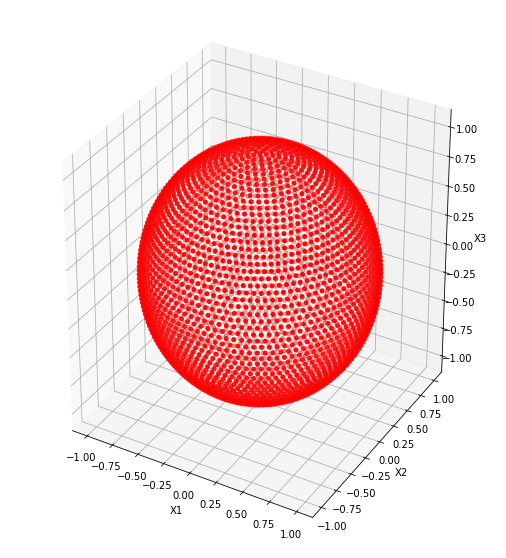

In [ ]:
####### 3. Plot (2D or 3D) the data points for each dataset and color them according to the original class #######

### Changed this slightly since our map only maps the numbers 0-6, we used the 'New Class' column which is just the 'Class' column -1

# Just to make it look nice, here are the color codes for the colors of the rainbow and black
# We will map the different classes to the different classes, so we can tell where they match; this will become a new value in our dataframe as well
colors = ['#FF0000', '#FF7F00', '#FFFF00','#00FF00','#0000FF','#000000','#9400D3']
data['c'] = data['New Class'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})

# Plot the figure
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data['c'], s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.show()

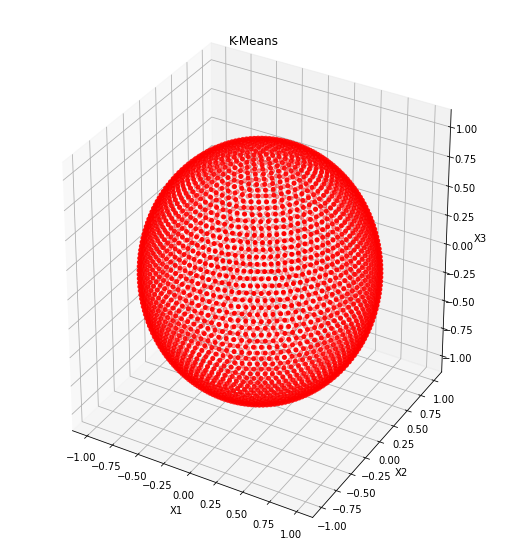

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on K-means ###
data['c'] = data['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c=data.c, s=15)
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("K-Means")
plt.show()

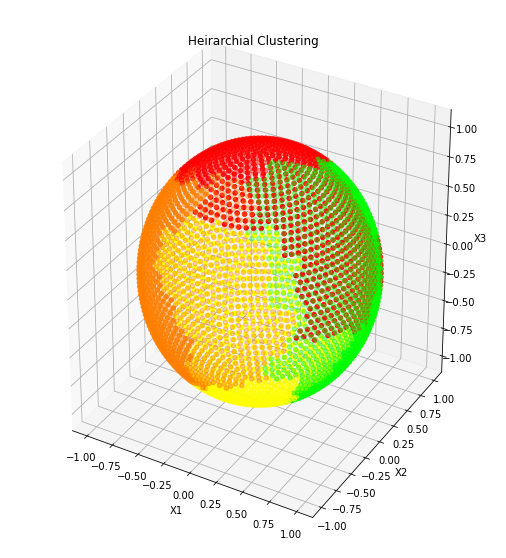

In [ ]:
####### 4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm #######

### Plotting based on Hierarchical Clustering ###
data['c'] = data['Heirarchial_PC'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4],5:colors[5],6:colors[6]})
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], c = data['c'], marker='o')
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[3])
plt.title("Heirarchial Clustering")
plt.show()

# World Indicators

Task 2

The world indicators dataset compares different countries based on selected attributes.
1. Use K-means and hierarchical clustering methods to group similar countries
together
2. Use Internal validation metrics to report the cluster quality
3. Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups
4. Generate three different scatter plots of your choice and color the data points
according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs
GDP”, etc.


### Preparation for Codes

In [ ]:
df_WI = pd.read_csv('World Indicators.csv')
df_WI 

Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Lending Interest  \
0                    0.023             0.1             0.080   
1                    0.107             0.1             0.188   
2                    0.060             0.0               NaN   
3                    0.039             0.1             0.110   
4                    0.068             0.0               NaN   
..                     ...             ...               ...   
203                    NaN             NaN               NaN   
204                  0.006             0.7             0.033   
205                  0.010             0.5             0.098   
206                  0.014             0.4             0.172   
207                    NaN             0.4               NaN   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                      72.0                  69.0                 0.9   
1                      53.0                  50.0                 0.5   
2                      60.0                  58.0                 0.8   
3                      46.0                  47.0                 1.5   
4                      56.0                  55.0                 0.5   
..                      ...                   ...                 ...   
203                     NaN                   NaN                 NaN   
204                    81.0                  76.0                 0.9   
205                    80.0                  73.0                 1.4   
206                    77.0                  71.0                 1.0   
207                    83.0                  76.0                 NaN   

     Population 0-14  Population 15-64  Population 65+  Population Urban  \
0              0.272             0.681           0.047             0.682   
1              0.477             0.499           0.024             0.409   
2              0.432             0.539           0.029             0.423   
3              0.340             0.625           0.035             0.565   
4              0.458             0.517           0.025             0.265   
..               ...         

By Finding the percentage of NA/NULL values we identify what are the columns to be removed.

In [ ]:
df_WI.isnull().sum()*100/len(df_WI)

Birth Rate                 4.326923
Business Tax Rate         12.980769
Days to Start Business    12.980769
Energy Usage              34.615385
GDP                        9.615385
Health Exp % GDP          11.057692
Health Exp/Capita         11.057692
Hours to do Tax           13.461538
Infant Mortality Rate      9.615385
Internet Usage             4.326923
Lending Interest          37.019231
Life Expectancy Female     5.288462
Life Expectancy Male       5.288462
Mobile Phone Usage         5.769231
Population 0-14            8.173077
Population 15-64           8.173077
Population 65+             8.173077
Population Urban           0.961538
Region                     0.000000
Country                    0.000000
dtype: float64

Therefore from the above table we can infer that "Energy Usage" and "Lending Interest" columns can be removed.

Cleaning the dataset as the table consists of objects and string characters. We need to remove them so as to ensure that when we proceed with clustering we will only be dealing with float values/integers.

In [ ]:
### Cleaning the dataset 
array = []
for col in df_WI.columns:
  array.append(col)
del array[-2:]

for i in array:
  df_WI[f'{i}'] = df_WI[f'{i}'].astype(str)
  df_WI[f'{i}'] = df_WI[f'{i}'].str.replace(r"[\"\'\|\?\=\%\@\#\*\,$]", '')
  df_WI[f'{i}'] = df_WI[f'{i}'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


From above, we can use the percentages of NA/NULL values to identify what columns need to be removed.

In [ ]:
df_WI.drop(['Energy Usage','Lending Interest'], axis = 1, inplace = True)

Now, that we have removed the two columns with null value percentage of over 20%, we will now drop the rows with only NA/ null values.

The reason we are deleting them is as follows:


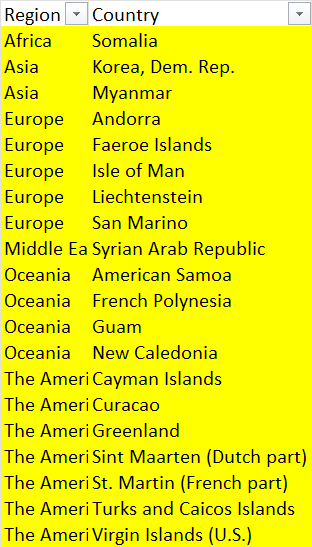



We first thought of filling the rows with null values with mean and median of their respective dataset, but the WORLD INDICATORS datasets consists GDP column where if we add median values in the rows with null values in GDP to countries such as Somalia, Korea, Myanmar, Andorra, Isle of man etc. Our main objective of clustering the countries into their respective classes would fail. 

for ex: if we fill in median gdp of entire world indicators dataset to the missing values then the GDP of Somalia would be even greater than it's actual GDP which is approximately 7.2 Billion.

In [ ]:
df_WI = df_WI.dropna()

Algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.

Normalization also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.



Using The maximum absolute scaling
The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value. We can apply the maximum absolute scaling in Pandas using the .max() and .abs() methods, as shown below.

In [ ]:
# copy the data
df_max_scaled = df_WI.copy()
almost_all_columns = df_max_scaled.columns
almost_all_columns = almost_all_columns[0:-2] 

# apply normalization techniques
for column in almost_all_columns:
  df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
df_max_scaled = df_max_scaled.dropna()
display(df_max_scaled)

Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0          0.50           0.212327                0.036023  0.012815   
1          0.92           0.153642                0.095101  0.006703   
2          0.74           0.194338                0.041787  0.000470   
3          0.48           0.057505                0.086455  0.000984   
4          0.84           0.128281                0.018732  0.000669   
..          ...                ...                     ...       ...   
201        0.36           0.082277                1.000000  0.000281   
202        0.30           0.085815                0.059078  0.001524   
204        0.26           0.137128                0.007205  1.000000   
205        0.30           0.123562                0.010086  0.003041   
206        0.40           0.185196                0.203170  0.020374   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0            0.248588           0.023516         0.173462   
1            0.192090           0.017965         0.108462   
2            0.254237           0.003432         0.103846   
3            0.293785           0.040775         0.058462   
4            0.361582           0.003936         0.103846   
..                ...                ...              ...   
201          0.338983           0.049455         0.076538   
202          0.299435           0.094368         0.080769   
204          1.000000           0.854562         0.071923   
205          0.497175           0.122426         0.129231   
206          0.254237           0.049152         0.332308   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                 0.205357        0.111111                0.837209   
1                 0.955357        0.111111                0.616279   
2                 0.535714        0.000000                0.697674   
3                 0.348214        0.111111                0.534884   
4                 0.607143        0.000000                0.651163   
..                     ...             ...                     ...   
201               0.196429        0.333333                0.860465   
202               0.178571        0.666667                0.848837   
204               0.053571        0.777778                0.941860   
205               0.089286        0.555556                0.930233   
206               0.125000        0.444444                0.895349   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                0.851852                0.45         0.545090   
1                0.617284                0.25         0.955912   
2                0.716049                0.40         0.865731   
3                0.580247                0.75         0.681363   
4                0.679012                0.25         0.917836   
..                    ...                 ...              ...   
201              0.827160                0.50         0.567134   
202              0.814815                0.70         0.414830   
204              0.938272                0.45         0.394790   
205              0.901235                0.70         0.446894   
206              0.876543                0.50         0.583166   

     Population 15-64  Population 65+  Population Urban        Region  \
0            0.794632        0.198312             0.682        Africa   
1            0.582264        0.101266             0.409        Africa   
2            0.628938        0.122363             0.423        Africa   
3            0.729288        0.147679             0.565        Africa   
4            0.603267        0.105485             0.265        Africa   
..                ...             ...               ...           ...   
201          0.760793        0.274262             0.663  The Americas   
202          0.826138        0.358650             0.089  The Americas   
204          0.780630        0.561181             0.809  The Americas   
205          0.744457        0.586498      

Plotting a heatmap to view the scaled dataset

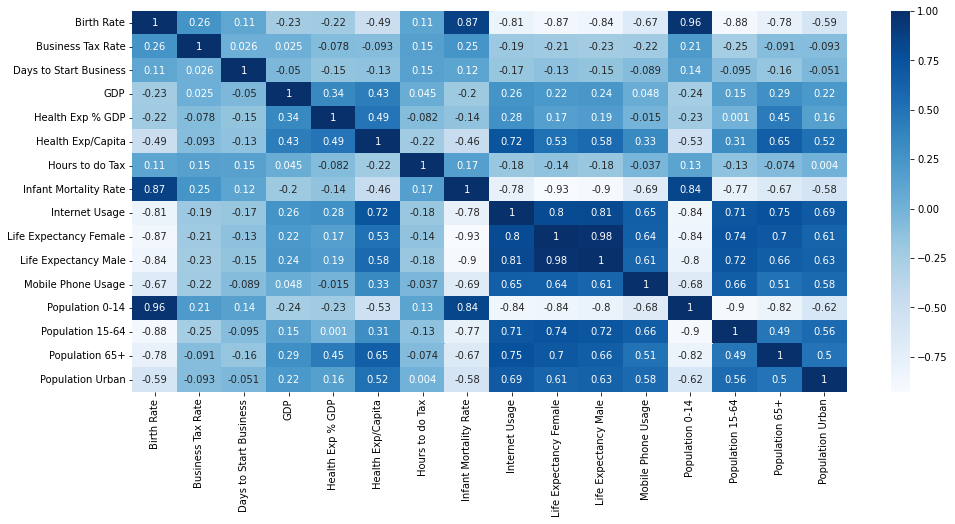

In [ ]:
plt.figure(figsize = (16, 7))
corr = df_max_scaled.corr()
sns.heatmap(corr, cmap = "Blues", annot=True)

In [ ]:
df_max_scaled.head(5)
df_WI.head(5)

Birth Rate  Business Tax Rate  Days to Start Business           GDP  \
0       0.025               72.0                    25.0  1.990709e+11   
1       0.046               52.1                    66.0  1.041159e+11   
2       0.037               65.9                    29.0  7.294900e+09   
3       0.024               19.5                    60.0  1.529242e+10   
4       0.042               43.5                    13.0  1.039576e+10   

   Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0             0.044              233.0            451.0   
1             0.034              178.0            282.0   
2             0.045               34.0            270.0   
3             0.052              404.0            152.0   
4             0.064               39.0            270.0   

   Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                  0.023             0.1                    72.0   
1                  0.107             0.1                    53.0   
2                  0.060             0.0                    60.0   
3                  0.039             0.1                    46.0   
4                  0.068             0.0                    56.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  69.0                 0.9            0.272   
1                  50.0                 0.5            0.477   
2                  58.0                 0.8            0.432   
3                  47.0                 1.5            0.340   
4                  55.0                 0.5            0.458   

   Population 15-64  Population 65+  Population Urban  Region       Country  
0             0.681           0.047             0.682  Africa       Algeria  
1             0.499           0.024             0.409  Africa        Angola  
2             0.539           0.029             0.423  Africa         Benin  
3             0.625           0.035             0.565  Africa      Botswana  
4             0.517           0.025             0.265  Africa  Burkina Faso

### Start Analysis

In [ ]:
####### Use  K-means and hierarchical clustering methods to group similar countries together #######

### Finding the Silhouette Value to determine the ideal K ###
data = df_max_scaled
result = []
index_vals = []
for i in range(2,10):
  kmeans_vals = KMeans(n_clusters=i)
  kmeans_vals.fit(data.iloc[:,0:16])
  result.append(metrics.silhouette_score(data.iloc[:,0:16], kmeans_vals.labels_))
  index_vals.append(i)

list_of_tuples = list(zip(index_vals, result))
df = pd.DataFrame(list_of_tuples,columns=['K value', 'Value'])
print(df[df.Value == df.Value.max()])

   K value     Value
0        2  0.408838


Alternative method to find the K value using Silhouette Score method

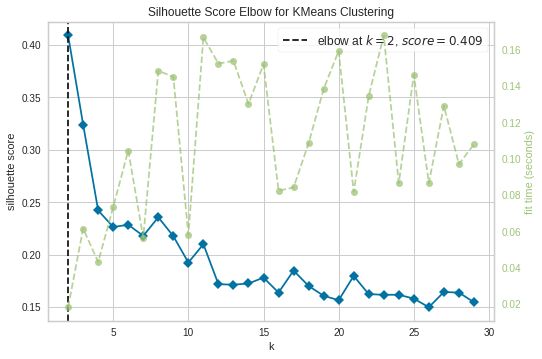

In [ ]:
# Silhouette Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df_max_scaled.iloc[:,0:16])       ## excluding the last two columns as they consists of characters
visualizer.show()       

1. Use K-means and hierarchical clustering methods to group similar countries
together


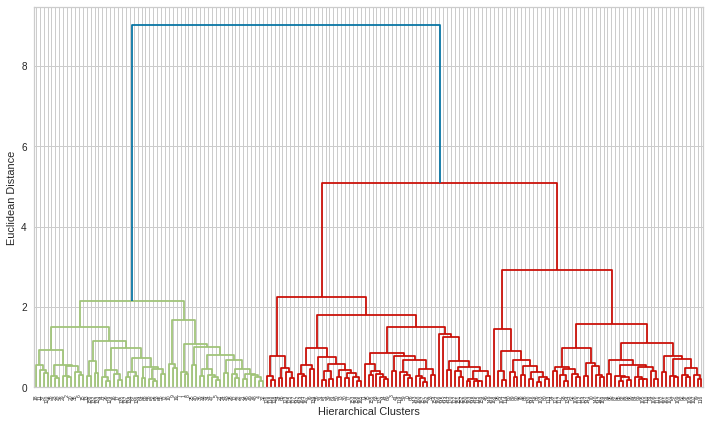

In [ ]:
####### Use  K-means and hierarchical clustering methods to group similar countries together #######

### Start the clustering ###

# Ideal K value from SHS value -- see above
K = 2
# Create an empty dataframe for the number of classes
df_cluster_info = pd.DataFrame({'KMeans Clusters' : [], 'Hierarchical Clusters' : []})

### K-means ###

# Import the dataset as a function titled data
data = df_max_scaled
# KMeans clustering using the number of classes -- see variable titled K
kmeans = KMeans(n_clusters = K)
data['Cluster'] = kmeans.fit_predict(data.iloc[:,0:16])

# Getting the unique number of dendogram colors -- aka the number of clusters from the dendogram
# This will also create a dendogram
plt.figure(figsize = (12,7))
dendogram = shc.dendrogram(shc.linkage(data.iloc[:,0:16], method='ward'), show_leaf_counts=True)
lst_colors = dendogram.get('leaves_color_list')
x = np.array(lst_colors)
dendogram_clusters = len(np.unique(x))
plt.xlabel('Hierarchical Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# Creaing the number of clusters
# Use the linkage distance to create clusters given the number of classes -- see dendogram
heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,0:16])
data['Heirarchial_PC'] = heirarchial_predict

# Updating the cluster info for ease later
df_cluster_info['KMeans Clusters'] = data['Cluster']
df_cluster_info['Hierarchical Clusters'] = data['Heirarchial_PC']


How to interpret the dendrogram:

At the bottom of the tree, each observation is a leaf, and as we move up the tree the observations are fused into branches. Continuing up the tree, the branches fuse with other branches or leaves. The earlier the leaves/branches fuse, the more similar the observations are. It is important to remember that the similarity is based on the horizontal axis, not the vertical axis. Observations that fuse early at the bottom of the tree are more similar than observations/branches that fuse higher up in the tree (the latter can in fact be very different).

Reason for opting Ward method for linkage:
 
Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster.


Calculating Silhoutte Score for K means and Hierarchial Clustering

2. Use Internal validation metrics to report the cluster quality


In [ ]:
####### Use Internal validation metrics to report the cluster quality #######

from validclust import dunn
kmeans_vals = KMeans(n_clusters=K)
kmeans_vals.fit(data.iloc[:,0:16])

heirarchial = AgglomerativeClustering(n_clusters = dendogram_clusters)
heirarchial_predict = heirarchial.fit_predict(data.iloc[:,0:16])

dist_df_WI = pairwise_distances(data.iloc[:,0:16])
dunn_df_WI_KM = dunn(dist_df_WI,  kmeans_vals.labels_)
dunn_df_WI_HD = dunn(dist_df_WI,  heirarchial_predict)

metrics.silhouette_score(df_max_scaled.iloc[:,0:16], df_max_scaled['Cluster'], metric='cityblock')
metrics.silhouette_score(df_max_scaled.iloc[:,0:16], df_max_scaled['Heirarchial_PC'], metric='cityblock')

print('CH World Indicators Data - KMeans: '+ str(metrics.calinski_harabasz_score(data.iloc[:,0:16], kmeans_vals.labels_)))
print('DI World Indicators Data - KMeans: '+ str(dunn_df_WI_KM))
print('Silhouette Coefficient score - KMeans: '+ str(metrics.silhouette_score(df_max_scaled.iloc[:,0:16], df_max_scaled['Cluster'], metric='cityblock')))

print('CH World Indicators Data - Hierarchical Data: '+ str(metrics.calinski_harabasz_score(data.iloc[:,0:16], heirarchial_predict)))
print('DI World Indicators Data - Hierarchical Data: '+ str(dunn_df_WI_HD))
print('Silhouette Coefficient score - Hierarchial Data: '+ str(metrics.silhouette_score(df_max_scaled.iloc[:,0:16], df_max_scaled['Heirarchial_PC'], metric='cityblock')))


CH World Indicators Data - KMeans: 170.31186750739386
DI World Indicators Data - KMeans: 0.12182828282932096
Silhouette Coefficient score - KMeans: 0.46287905094649456
CH World Indicators Data - Hierarchical Data: 144.63846907354508
DI World Indicators Data - Hierarchical Data: 0.13403146412915268
Silhouette Coefficient score - Hierarchial Data: 0.4390487003791064


We report that proceeding with KMeans clustering over Hierarchial because when we calculate the CH score and Silhouette coefficient score we can infer that KMeans clustering proves to have a higher score and has a better separation between the datapoints.

Although, There are advantages and disadvantages to both and which method one should choose depends on the objective of the study. One can keep in mind that they can be viewed as complementary methods where hierarchical clustering can be used in an exploratory sense before continuing to a non-hierarchical clustering.

3. Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups


In [ ]:
####### Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups #######

kmeans_group = df_max_scaled.groupby('Cluster')['Country'].agg(list)
kmeans_group =  pd.DataFrame (kmeans_group, columns = ['Country'])
hierarchical_group = df_max_scaled.groupby('Heirarchial_PC')['Country'].agg(list)
hierarchical_group  =  pd.DataFrame (hierarchical_group, columns = ['Country'])
print("KMeans clusters")
display(kmeans_group)
print('Hierarchical Clusters')
display(hierarchical_group)

print('The best clustering solution would be the KMeans values since it has the better SH score and CH score')

KMeans clusters


Country
Cluster                                                   
0        [Algeria, Angola, Benin, Botswana, Burkina Fas...
1        [Mauritius, Morocco, Seychelles, Tunisia, Arme...

Hierarchical Clusters


Country
Heirarchial_PC                                                   
0               [Algeria, Botswana, Egypt, Arab Rep., Mauritiu...
1               [Angola, Benin, Burkina Faso, Burundi, Cameroo...

The best clustering solution would be the KMeans values since it has the better SH score and CH score


4. Generate three different scatter plots of your choice and color the data points
according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs
GDP”, etc.


Text(0.5, 1.0, 'Infant Mortality Rate VS GDP')

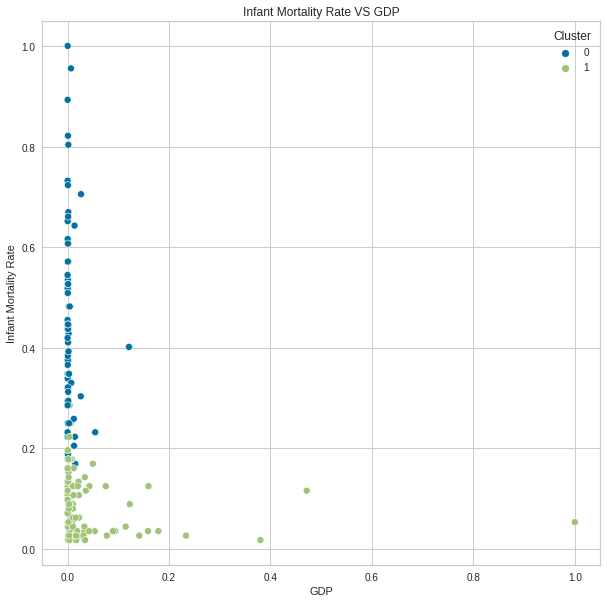

In [ ]:
####### Generate three different scatter plots of your choice and color the data points according to the group ####### 
# SCATTER PLOT 1
### By importing seaborn library we plot the graphs for the two different cluster. By using the syntax "HUE" we separate the two classes found using K means clustering.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(y = "Infant Mortality Rate", x = "GDP", hue = "Cluster", data = df_max_scaled)

plt.title('Infant Mortality Rate VS GDP')

Text(0.5, 1.0, 'Internet Usage VS Population Urban')

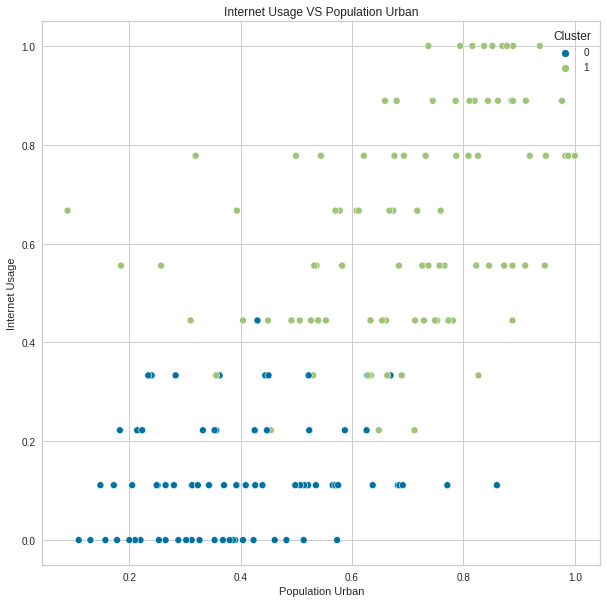

In [ ]:
# SCATTER PLOT 2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(y = "Internet Usage", x = "Population Urban", hue = "Cluster", data = df_max_scaled)
plt.title('Internet Usage VS Population Urban')

Text(0.5, 1.0, 'Life Expectancy Female VS GDP')

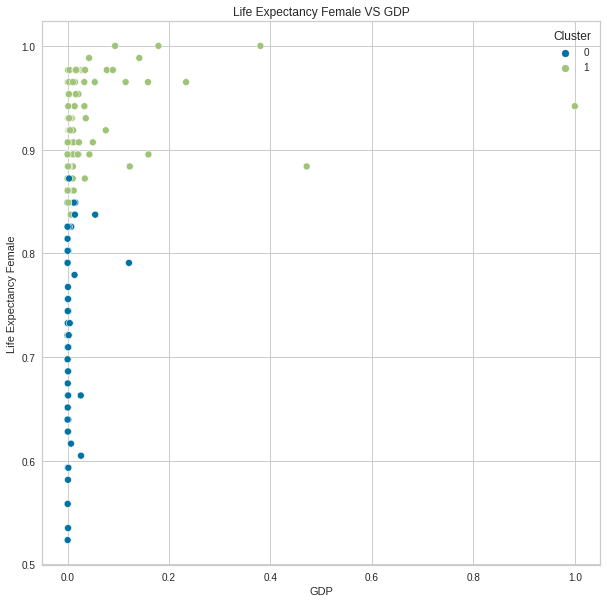

In [ ]:
#  SCATTER PLOT 3
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(y = "Life Expectancy Female", x = "GDP", hue = "Cluster", data = df_max_scaled)
plt.title('Life Expectancy Female VS GDP')

In [ ]:
! jupyter nbconvert --to html Group_3_Project_1.ipynb

[NbConvertApp] Converting notebook Group_3_Project_1.ipynb to html
[NbConvertApp] Writing 3280569 bytes to Group_3_Project_1.html
